In [370]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def MAP_Elite(n_legs):
    P1 = np.zeros([5, 5])
    C1 = np.zeros([6, n_legs])
    C2 = np.zeros([6, n_legs])
    P2 = np.zeros([5, 5])
    #for i in range(5):
     #   for j in range(5):
      #      C1[i][j] = C2
    
    #P = [[P1, P2], [P2, P1]]
    #C = [[C1, C2], [C2, C1]]
    
    P = P1
    C_new = [C1, C1, C1, C1, C1]
    C = [C_new, C_new, C_new, C_new, C_new]
    
    #P_discrete = 
    
    #There are 6 parameters for each leg (i1 , i2 , i1 , i2 , i1 ,i2 ), 
    #therefore each controller is fully described by 36 parameters.
    # Each parameter can have one of these possible values: 0, 0.05, 0.1, ... 0.95, 1.
    
    
    #print(len(P[0]))
    
    for i in range(1, 500):
        if (i < 40):
            c_prim = random_controller()
        else:
            c = random_selec(C)
            c_prim = random_var_v2(c)
        X = behaviour_descr(simulation(c_prim))
        x_prim_leg_1, x_prim_leg_2 = int(X[0]), int(X[1]) 
        p_prim = performance(simulation(c_prim))
        #print(int(x_prim_leg_1))
        if(P[x_prim_leg_1][x_prim_leg_2] < p_prim):
            P[x_prim_leg_1][x_prim_leg_2] = p_prim  
            C[x_prim_leg_1][x_prim_leg_2] = c_prim
        heat_map = sns.heatmap(Perf, cmap="YlGnBu")
    
    return P, C


def random_controller():
    rand_array = np.arange(0, 1, 0.05)
    controller = np.zeros([6, 2])
    proba = np.empty(rand_array.size)
    proba.fill(0.05)
    #index = np.random.choice(0, 1)
    #print(contr1[2])
    #contr2 = np.zeros([6, 6])
    #controller = [[contr1, contr2], [contr2, contr1]]
    for i in range(2):
        seq = np.random.choice(rand_array, 6, replace = False, p = proba)
        for j in range(6):
            controller[j][i] = seq[j]
    return controller

def random_selec(C):
    selected_controller = C[np.random.choice([0, len(C[0]) - 1])][np.random.choice([0, len(C[0]) - 1])]
    return selected_controller

def random_var(control):
    index = np.random.rand([0, len(contr) - 1])
    for i in range(len(control)):
        if(index + 1 < len(contr)):
            control[i][index], control[i][index + 1] = control[i][index + 1], control[i][index] 
        else :
            control[i][index], control[i][index - 1] = control[i][index - 1], control[i][index] 
    return control

def random_var_v2(control):
    index = np.random.choice([0, len(control[0]) - 1])
    rand_array = np.arange(0, 1, 0.05)
    #controller = np.zeros([6, 6])
    proba = np.empty(rand_array.size)
    proba.fill(0.05)
    for i in range(len(control[1])):
        control[index][i] = np.random.choice(rand_array, 1, replace = False, p = proba)
    return control

def simulation(c_prim):
    contact = [0, 1]
    legs = len(c_prim[1])
    p = 1.5 * np.random.randn(300) + 2
    on_ground = np.zeros([300, legs])
    for i in range(legs):
        for j in range(300):
            #on_ground[j][i] = np.random.choice(contact, 1, replace=True, p = [0.05, 0.95])
            if(p[j] < 1.5):
                on_ground[j][i] = 0
            else :
                on_ground[j][i] = 1
    return on_ground

def behaviour_descr(on_ground):
    # 1 : contact
    # 0 : no contact
    # The result is 6 Boolean time series (Ci for the ith leg).
    legs = len(on_ground[1])
    x = np.zeros(legs)
    x2 = np.zeros(legs)
    numTimesteps = 300
    
    for j in range(legs):
        for i in range(numTimesteps):
            x[j] += on_ground[i][j] / numTimesteps
            #print(x[j])
            
        #print(x[j])
    #x = np.mean(x)
    
    for j in range(legs):
        x[j] = np.round(x[j], 1)
        if(x[j] < 0.10):
            x[j] = 0
        elif(x[j] < 0.35):
            x[j] = 1
        elif(x[j] < 0.65):
            x[j] = 2
        elif(x[j] < 0.85):
            x[j] = 3
        else :
            x[j] = 4
            
    
    #print("X = ", x)
    return x

def performance(on_ground, distance = 3000):
    
    #perf = distance/time
    #for i in range(len(on_ground[0])):
    for j in range(len(on_ground[1])):
        if(np.count_nonzero(on_ground[j], 0) > 100):
            perf = np.random.choice([1, 3])
        else:
            perf = np.random.choice([5, 15])
    
    return perf

ValueError: left cannot be >= right

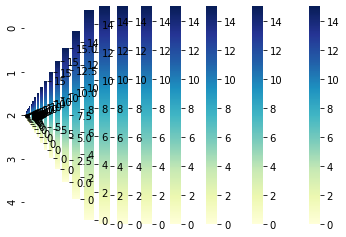

In [371]:
Perf, Control = MAP_Elite(2)
Perf

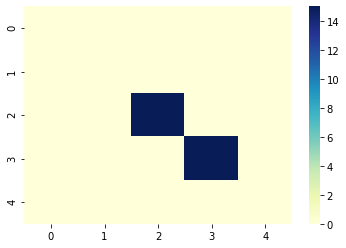

In [369]:
heat_map = sns.heatmap(Perf, cmap="YlGnBu")

In [143]:
################################## Multiples tests personnels ############################################

b = np.array([
            [[2, 5, 3, 1], [1, 3, 9, 8], [1, 2, 3, 5], [0, 4, 11, 12]], 
            [[1, 2, 3, 5], [0, 4, 11, 12], [1, 2, 3, 5], [0, 4, 11, 12]],
            [[1, 2, 3, 5], [0, 4, 11, 12], [1, 2, 3, 5], [0, 4, 11, 12]],
            [[1, 2, 3, 5], [0, 4, 11, 12], [1, 2, 3, 5], [0, 4, 11, 12]]
            
            ])
b.size

64

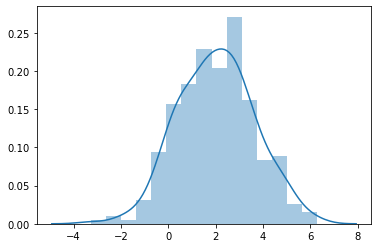

In [364]:

p = 1.5 * np.random.randn(300) + 2
x = 2 * np.random.randn(10) + 1
#plt.hist(x, bins=50)
#plt.gca().set(title='Frequency Histogram', ylabel='Frequency');
sns.distplot(p)
#print(p)

In [302]:
P1 = np.zeros([5, 5])
C1 = np.zeros([6, 2])
C2 = np.zeros([6, 2])
P2 = np.zeros([5, 5])
C_new = [C1, C1, C1, C1, C1]

C = [C_new, C_new, C_new, C_new, C_new]
P1[4][4]

0.0

In [228]:
rand_array = np.arange(0, 1, 0.05)
controller = np.zeros([6, 2])
#print(controller)
proba = np.empty(rand_array.size)
proba.fill(0.05)
index = np.random.choice([0, 1])
    #print(contr1[2])
    #contr2 = np.zeros([6, 6])
    #controller = [[contr1, contr2], [contr2, contr1]]
for i in range(2):
    seq = np.random.choice(rand_array, 6, replace = False, p = proba)
    for j in range(6):
        controller[j][i] = seq[j]
    #controller[i][1] = np.random.choice(rand_array, 6, replace = False, p = proba)

print(len(controller[1]))

2
